### ДЗ1. Эконометрика_2.


#### Гельмиза Арсений БЭК211

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#### Задание 4

In [13]:
df = pd.read_csv("data_hw2.1.csv", sep = ";")
display(df)

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,smsa66,wage,enroll,KWW,IQ,married,libcrd14,exper,lwage,expersq
0,1,0,0,7,29,NaN,NaN,158413,1,0,...,1,548,0,15.0,NaN,1.0,0.0,16,"6,306274891",256
1,2,0,0,12,27,8.0,8.0,380166,1,0,...,1,481,0,35.0,93.0,1.0,1.0,9,"6,175867081",81
2,3,0,0,12,34,14.0,12.0,367470,1,0,...,1,721,0,42.0,103.0,1.0,1.0,16,"6,580638885",256
3,4,1,1,11,27,11.0,12.0,380166,1,0,...,1,250,0,25.0,88.0,1.0,1.0,10,"5,52146101",100
4,5,1,1,12,34,8.0,7.0,367470,1,0,...,1,729,0,34.0,108.0,1.0,0.0,16,"6,591673851",256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,2986,0,1,12,25,8.0,12.0,82135,1,0,...,0,335,0,15.0,NaN,1.0,0.0,7,"5,814129829",49
2986,2987,0,1,13,34,NaN,NaN,88765,1,0,...,0,481,0,43.0,NaN,1.0,1.0,15,"6,175867081",225
2987,2988,0,1,12,24,11.0,NaN,89271,0,0,...,0,500,0,25.0,109.0,1.0,0.0,6,"6,214608192",36
2988,2989,0,1,12,31,NaN,NaN,110376,1,0,...,0,713,0,32.0,107.0,1.0,1.0,13,"6,569480896",169


###### (а) (2 балла) Объясните, почему переменная educ может являться эндогенной? Какие из имеющихся показателей могут быть использованы в качестве инструментальных переменных в методах IV и 2SLS. Аргументируйте свой выбор.


Переменная educ может являться эндогенной в случае, если нарушается предпосылка теоремы Гаусса-Маркова об отсутствии корреляции регрессора с ошибкой модели. Корреляция может быть обнаружена в случае, если регрессор educ связан с пропущенной объясняющей переменной модели. Например, пропущенной переменной может являться социальная активность респондента (количество лет обучения связано с количеством социальных связей и знакомств), а социальная активность респондента также имеет связь с получаемой зарплатной, поскольку для многих людей социальный капитал и знакомства являются важным фактором продвижения по карьерной лестнице и, следоватлеьно, формирования зарплаты. Это приводит к образованию пробелмы эндогенности. 


Для устранения возникшей проблемы эндогенности можно воспользоваться инструментальными переменными. Переменные nearc2 и nearc4 имеют корреляцию с эндогенной переменной educ, поскольку близость проживания рядом с определенногодичным колледжем связана с зависимой переменной educ, при этом переменные nearc2 и nearc4 не имеют корреляции с социальной активностью респондента. 

###### (б) (3 балла) Оцените с помощью OLS уравнение для логарифма зарплаты, используя переменные educ, exper, exper2, black, south, smsa, от reg661 до reg668, а также smsa66 в качестве объясняющих переменных.


Чтобы получить полулогарифмическую регрессионную модель воспользуемся методом наименьших квадратов OLS Regression. Зависимой переменной является ln(wage); объясняющими – educ, exper, expersq, black, south, smsa, от reg661 до reg668 и smsa66. 

In [15]:
import statsmodels.api as sm

In [96]:
x = df[["educ", "exper", "expersq", "black", "south", "smsa", "reg661","reg662",
        "reg663","reg664","reg665","reg666","reg667","reg668","smsa66"]]

y = np.log(df["wage"])

halflog_lin_model = sm.OLS(y, x).fit()

print(halflog_lin_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   wage   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          2.273e+04
Date:                Fri, 15 Mar 2024   Prob (F-statistic):                        0.00
Time:                        23:20:09   Log-Likelihood:                         -2633.8
No. Observations:                2990   AIC:                                      5298.
Df Residuals:                    2975   BIC:                                      5388.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Уравнение оцененной модели:

$
ln(wage) = 0.2673 \cdot educ + 0.3347 \cdot exper  -0.0099 \cdot expersq  -0.0411 \cdot black  -0.0851   
\cdot south +  0.1927 \cdot smsa  + 0.3956 \cdot reg661 + 0.5116  \cdot reg662 + 0.5643   
\cdot reg663 + 0.5098   \cdot reg664 + 0.5970 \cdot reg665 + 0.6631 \cdot reg666 + 0.5401 \cdot reg667 + 0.2679 \cdot reg668 + 0.0993 \cdot smsa66
$

###### (в) (3 балла) Оцените модель для log(wage) из пункта (б) с помощью метода инструментальных переменных (IV), используя nearc4 в качестве инструмента для educ. Сравните 95–процентный доверительный интервал для коэффициента при переменной educ с полученным значением в пункте (б).

In [2]:
import sys
print(sys.executable)

/Users/arseniygelmiza/opt/anaconda3/bin/python


In [6]:
!pip install linearmodels

     |████████████████████████████████| 1.5 MB 162 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 505 kB/s eta 0:00:01
     |████████████████████████████████| 94 kB 580 kB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 470 kB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 143 kB/s eta 0:00:01
     |████████████████████████████████| 17.7 MB 425 kB/s eta 0:00:01   |▏                               | 71 kB 574 kB/s eta 0:00:31     |████████▎                       | 4.5 MB 234 kB/s eta 0:00:56     |███████████▊                    | 6.4 MB 355 kB/s eta 0:00:32     |█████████████████▎              | 9.5 MB 519 kB/s eta 0:00:16
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfu

In [17]:
from linearmodels.iv import IV2SLS

In [66]:
x2 = df[["exper", "expersq", "black", "south", "smsa", "reg661","reg662",
        "reg663","reg664","reg665","reg666","reg667","reg668","smsa66"]]

y2 = np.log(df["wage"])

e = df["educ"]
z = df["nearc4"]

IV_halflog_lin_model = IV2SLS(dependent=y2, exog=x2, endog=e, instruments = z).fit()


print(IV_halflog_lin_model)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                   wage   R-squared:                      0.9907
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9907
No. Observations:                2990   F-statistic:                 3.119e+05
Date:                Fri, Mar 15 2024   P-value (F-stat)                0.0000
Time:                        21:29:21   Distribution:                 chi2(15)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
exper          0.2656     0.0263     10.103     0.0000      0.2140      0.3171
expersq       -0.0061     0.0014    -4.2206     0.00

Уравнение оцененной модели c одной инстурментальной переменной:

$
ln(wage) =  0.2656 \cdot exper  -0.0061 \cdot expersq + 0.0088 \cdot black  
-0.1067 \cdot south +  0.1009 \cdot smsa  + 0.1577 \cdot reg661 + 0.2751  
\cdot reg662 + 0.3238  \cdot reg663 + 0.2234  \cdot reg664 + 0.3656 \cdot reg665 + 0.4133 \cdot reg666 
+ 0.3292 \cdot reg667 - 0.0008  \cdot reg668 + 0.0414 \cdot smsa66 + 0.3118 \cdot educ_{IV}
$

Сравним 95%-ые доверительные интервалы для коэффициента при переменной educ для модели из пункта (б) и для модели с инструментальными переменными:

In [77]:
print("95% Доверительный интервал для переменной educ в halflog_lin_model:", (0.261, 0.273))
print("95% Доверительный интервал для переменной educ в IV_halflog_lin_model:", (0.2802, 0.3433))


95% Доверительный интервал для переменной educ в halflog_lin_model: (0.261, 0.273)
95% Доверительный интервал для переменной educ в IV_halflog_lin_model: (0.2802, 0.3433)


##### (г) (3 балла) Протестируйте инструментальную переменную nearc4 из пункта (в) на релевантность и валидность, используя соответствующие тесты.

Для теста качества (релевантности) инструментальной переменной nearc4 из пункта (в) воспользуемся F-статистикой первого шага двухшагового МНК (для регрессии X на Z).



Корреляционная матрица:

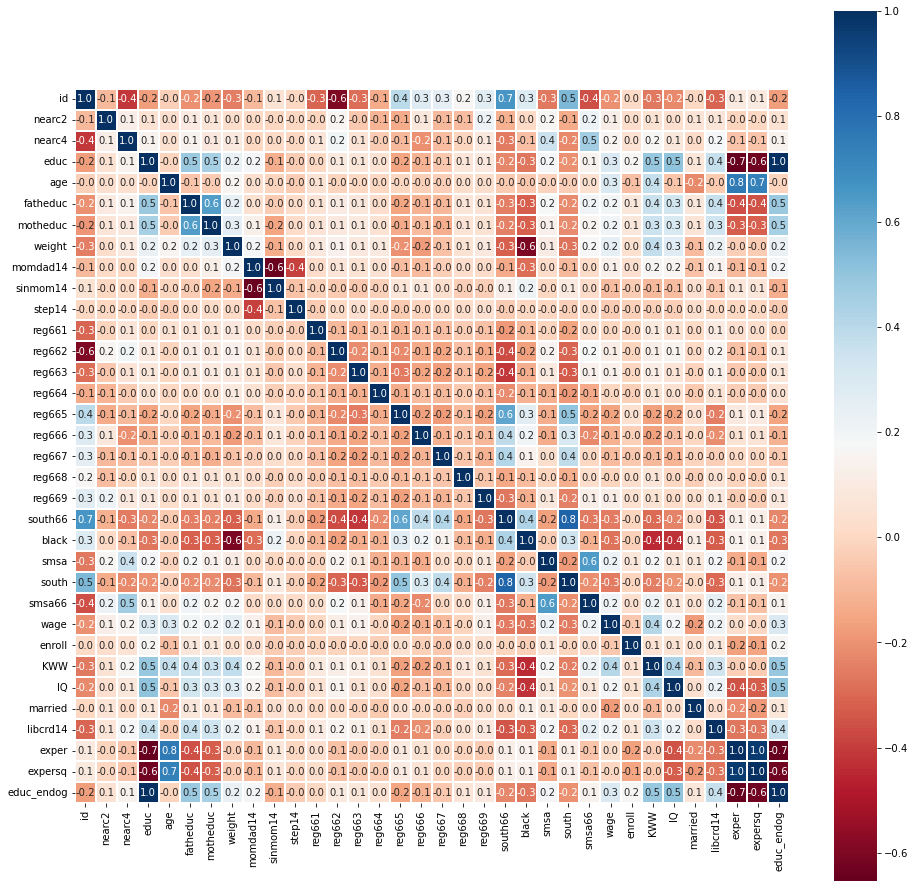

In [82]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(method='pearson'), 
            square=True, annot=True, fmt=".1f", 
            linewidths=0.1, cmap="RdBu");

По корреляционной матрице видно, что существует корреляция между переменными educ и nearc4. Значит выбранная инструментальная переменная коррелирует с зависимой переменной модели. Из чего можно сделать о релевантности инструментальной переменной

Для проведения теста на валидность воспользуемся тестом Хаусмана:

In [88]:
print(IV_halflog_lin_model.wu_hausman())

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 35.8606
P-value: 0.0000
Distributed: F(1,2974)


Вывод: поскольку p-value мало при любом адектвном уровне значимости мы отвергаем нулевую гипотезу о том, что все эндогенные инструменты экзогенны. Подтверждается проблема эндогенности после добавления инструментов, из чего можно сделать вывод о проблемах с валидностью выбранных инструментов в модели. 

Также, воспользуемся тестом Саргана:

In [86]:
print(IV_halflog_lin_model.sargan)

Sargan's test of overidentification
H0: The model is not overidentified.
Statistic: 2.4529
P-value: 0.1173
Distributed: chi2(1)


Вывод: в силу значения p-value 0.1173 мы не можем отвергнуть нулевую гипотезу о том, что модель не является избыточно идентифицируемой, что свидетельствует о правильном выборе инстурментов с точки зрения индетицификации модели. 

###### (д) (3 балла) В данном пункте используйте nearc2 вместе с nearc4 в качестве инструментов для educ в модели из пункта (б). Как оценки 2SLS сопоставляются с полученными ранее в пунктах (б) и (в) оценками?

In [79]:

x3 = df[["exper", "expersq", "black", "south", "smsa", "reg661","reg662",
        "reg663","reg664","reg665","reg666","reg667","reg668","smsa66"]]

y3 = np.log(df["wage"])

e1 = df["educ"]
z1 = df[["nearc4","nearc2"]]

IV2_halflog_lin_model = IV2SLS(dependent=y3, exog=x3, endog=e1, instruments = z1).fit()


#print(halflog_lin_model.summary())
#print(IV_halflog_lin_model)
print(IV2_halflog_lin_model)


                          IV-2SLS Estimation Summary                          
Dep. Variable:                   wage   R-squared:                      0.9901
Estimator:                    IV-2SLS   Adj. R-squared:                 0.9901
No. Observations:                2990   F-statistic:                 2.882e+05
Date:                Fri, Mar 15 2024   P-value (F-stat)                0.0000
Time:                        22:34:52   Distribution:                 chi2(15)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
exper          0.2364     0.0199     11.882     0.0000      0.1974      0.2754
expersq       -0.0045     0.0011    -4.1007     0.00

Уравнение оцененной модели с двумя инстурментальными переменными: 

$
ln(wage) =  0.2364 \cdot exper  -0.0045 \cdot expersq + 0.0299 \cdot black  
-0.1158 \cdot south +  0.0623 \cdot smsa  + 0.0574 \cdot reg661 + 0.1754  
\cdot reg662 + 0.2224  \cdot reg663 + 0.1026  \cdot reg664 + 0.2680 \cdot reg665 + 0.3080 \cdot reg666 
+ 0.2403 \cdot reg667 - 0.1141 \cdot reg668 + 0.0170 \cdot smsa66 + 0.3305 \cdot educ_{IV}
$

Вывод:

R-квадрат незначительно снизился по сравнению с моделоями пунктктов (б) и (в). Оценки коэфициентов изменились. На 95% уровне значимости в моделе из пункта (б) оценка коэффициента для переменной black - незначима, в модели из пункта (в) оценки коэффиициентов для переменных black, reg661, reg664, reg668, smsa66 - незначимы, в модели из пункта (д) оценки коэффиициентов для переменных black, sma, reg661, reg664, reg668, smsa66 - незначимы, остальные - значимы. 

###### (е) (3 балла) Протестируйте инструментальные переменные nearc2 и nearc4 из пункта (д) на релевантность и валидность, используя соответствующие тесты.

Для проведения теста на валидность воспользуемся тестом Хаусмана:

In [87]:
print(IV2_halflog_lin_model.wu_hausman())

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 35.8606
P-value: 0.0000
Distributed: F(1,2974)


Вывод: поскольку p-value мало при любом адектвном уровне значимости мы отвергаем нулевую гипотезу о том, что все эндогенные инструменты экзогенны. Подтверждается проблема эндогенности после добавления инструментов, из чего можно сделать вывод о проблемах с валидностью выбранных инструментов в модели. 

Также, воспользуемся тестом Саргана:

In [89]:
print(IV2_halflog_lin_model.sargan)

Sargan's test of overidentification
H0: The model is not overidentified.
Statistic: 2.4529
P-value: 0.1173
Distributed: chi2(1)


Вывод: в силу значения p-value 0.1173 мы не можем отвергнуть нулевую гипотезу о том, что модель не является избыточно идентифицируемой, что свидетельствует о правильном выборе инстурментов с точки зрения индетицификации модели.

###### (ё)  (3 балла) Сравните модели, полученные в пунктах (б), (в) и (д). Какую из моделей стоит выбрать? Аргументируйет Ваш выбор.

Как было отмечено ранее: R-квадрат незначительно снизился по сравнению с моделоями пунктктов (б) и (в). Оценки коэфициентов изменились. На 95% уровне значимости в моделе из пункта (б) оценка коэффициента для переменной black - незначима, в модели из пункта (в) оценки коэффиициентов для переменных black, reg661, reg664, reg668, smsa66 - незначимы, в модели из пункта (д) оценки коэффиициентов для переменных black, sma, reg661, reg664, reg668, smsa66 - незначимы, остальные - значимы. Проведенные тесты не показали существенной разницы между моделями с одной или двумя инструментальными переменными.

Значение F-стиатиски наибольшее в моделе с одной инструментальной, из чего можно сделать вывод о наибольшей эффективности и объясняющей силе модели IV_halflog_lin_model. 

#### Задание 5



###### (а) (2 балла) Предположите модель линейной регрессии вида:


$
y_i = \beta_0 + \beta_1 \cdot x_{i1} + \beta_2 \cdot x_{i2} + \beta_3 \cdot x_{i3} + \epsilon_i
$

###### Самостоятельно задайте значения коэффициентов β. Используйте объем выборки от 500 до 1000 наблюдений. Сгенерируйте признаки, указав использованные распределения. Сгенерируйте случайную ошибку из распределения Стьюдента с числом степеней свободы df, равным n + 1, где n — номер первой буквы вашей фамилии в алфавите.

In [37]:
n=4
beta_0 = 5
beta_1 = 2
beta_2 = 3
beta_3 = 1

Предположим, что признаки имеют равномерное распределние. Сгенерируем их:

In [44]:
np.random.seed(10)  


xs = np.random.randint(500, 1001)


x1 = np.random.uniform(low = -10, high = 11, size = xs)
x2 = np.random.uniform(low = -10, high = 11, size = xs)
x3 = np.random.uniform(low = -10, high = 11, size = xs)

print(x1,x2,x3)

[-3.72601581  0.38638852 -0.6966861   7.47013854  2.24975648 -9.4713937
  4.89336821 -4.42311134 -4.46434023 -6.84206479  4.36018702  7.14863854
 -2.94249673  8.70714714 -5.83944193 -9.35705027  8.42991374  5.27614579
  1.35849956 -7.2393788  -1.31298514  6.35330497  2.26192868 -6.16473984
  7.3477272  -7.7865615  -4.04488975 -8.62317141 -8.81467206  6.07457218
 -9.75245138  2.85081016 -3.03047263  1.75261567 -2.95450742 -1.36516653
 -8.38603446  7.9139028  -0.76026343 -7.43896291  5.36642712 -7.08556823
  6.10448103  7.47178512 -3.49466084  2.5492281   8.32024166 10.6434382
 -0.18453114  8.39063439 -3.78255732 -7.24288789  7.6991766   3.83976238
  2.5042317  -0.83657234 -2.51874314  2.32974943 -6.86110192 -6.40398944
 -1.65954502  3.39698285 -2.17708101 -9.94945801  1.52514347 -7.33359133
 -8.32435371 -5.06418949  3.85926389 -5.48598297 -5.73602107 -1.95983267
 -5.27767115 -7.59237522  2.24335808 -5.11453768  1.68688194  1.00002858
 -2.6298773   4.81196388  7.23477857 -7.17417693  2.6

Сгенерируем случайную ошибку из распределения Стъюдента с n+1 = 5 степенями свободы:

In [49]:
from scipy.stats import t

In [50]:
eps = t.rvs(5, size=xs)

print(eps)

[ 9.57857904e-01 -5.34923051e-01 -7.22613041e-01  1.58297561e+00
 -5.22946727e-01  1.31425455e+00 -3.64444364e-01  1.28978706e+00
 -4.47218058e-01  3.78205698e-01 -7.22311229e-01  1.47674712e-01
 -3.87136045e-01 -1.22084184e+00  7.33063302e-01 -3.83153995e-01
 -2.05748935e+00 -1.49160922e+00 -4.88414056e-01 -9.38047331e-01
  5.75635311e-01  1.54615691e+00 -1.70901858e+00  5.98882773e-01
  3.41597275e-02 -7.10145804e-01 -5.57313635e-01  1.06575227e+00
  2.27227552e+00 -4.46587419e-01  3.42390533e+00 -9.00632896e-01
  7.23699088e-02  1.83452163e+00 -6.57748882e-01 -5.59744196e-01
 -8.53650693e-01 -2.26339769e+00 -1.41726960e-01 -2.71393140e-01
 -2.44969365e+00  4.65043524e-03 -1.57447153e+00 -6.59528795e-01
  3.85487990e-02 -1.05751856e+00 -2.63975152e-01  1.37459250e+00
  1.37074769e-01 -7.35818226e-01 -2.71311570e+00 -2.53579610e+00
  1.12925298e+00  1.72665816e+00 -2.99989686e+00  1.12624032e+00
 -5.32482962e-02  1.90205684e+00  8.39430449e-02 -6.23067165e-01
 -1.16096468e+00  9.67489

###### (4 балла) Запишите функцию правдоподобия, принимающую в качестве аргументов вектор параметров β и df, матрицу X и вектор y. Используйте встроенную функцию плотности для распределения Стьюдента.